In [1]:
import numpy as np

In [2]:
def count_y_x_i(x): # задаваемая из условия функция
    f = np.exp(-x)/(x)
    return f

In [3]:
a = 1 # начальная точка
h = 0.25 # шаг
wh = [a + i * 0.25 for i in range(5)] # вектор значений Х

In [4]:
# значения точного решения
for i in wh:
    print(f'X = {i},  y = {count_y_x_i(i)}')

X = 1.0,  y = 0.36787944117144233
X = 1.25,  y = 0.22920383748815207
X = 1.5,  y = 0.14875344009895322
X = 1.75,  y = 0.09929939625739723
X = 2.0,  y = 0.06766764161830635


In [5]:
# настраивается в зависимости от условий (1 - нормальные граничные условия, 0 - 3-го рода)
index = 1

In [6]:
# задаются из условий задачи (граничные значения)
ya = np.exp(-1)
yb = np.exp(-2) / 2

In [7]:
# опишем функции p (1ая производная), q (просто функция), f (свободная переменная), которые необходимо
# найти вручную из первого уравнения системы
def p_mnoz(x):
    return 2/x
def q_mnoz(x):
    return -1
def f_mnoz(x):
    return 0

In [8]:
# составляет матрицу множителей a, b, c
def mnoz_of_slau(h, p, q, f):
    vect_a, vect_b, vect_c, vect_d  = [[] for i in range(4)]
    def ai(pi):
        return (1/(h**2)) - (pi/2*h)
        
    def bi(qi):
        return -2/(h**2) + qi
            
    def ci(pi):
        return (1/(h**2)) + (pi/2*h)
    
    for i in p:
        vect_a.append(ai(i)) 
        vect_c.append(ci(i))

    for i in q:
        vect_b.append(bi(i))

    for i in f:
        vect_d.append(i)
    
    return (vect_a, vect_b, vect_c, vect_d)
# работает нормально

In [9]:
def d_first_and_last(matrix, d): # меняем значения d1 и dn-1 вектора d 
    
    d[index] = d[index] - matrix[0][index] * ya
    d[-2] = d[-2] - matrix[-1][-2] * yb
    return d
# работает справно

по формуле ниже расчитываем значения погоночных коэффициентов
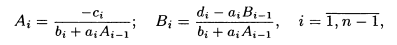

In [10]:
# создаем погоночные коэффициенты
def define_vectors_A_B(matrix, d):
    A = [0]
    B = [0]
    for i in range(5):
        A.append(-matrix[2][i] / (matrix[1][i] + (matrix[0][i] * A[-1])))
        B.append((d[i] - matrix[0][i] * B[-1]) / (matrix[1][i] + (matrix[0][i] * A[-2])))
    A.pop(0)
    B.pop(0)
    return A, B

находим корни с помощью формулы
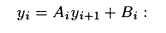

In [11]:
# ищем корни уравнения
def find_y(a, b):
    y = [ya, 0, 0, 0, yb]
    for i in range(len(y) -2, 0 + (index - 1), -1):
        y[i] = a[i] * y[i + 1] + b[i]
    return y

In [12]:
# составим матрицу значений p, q, f
matrix_of_mnoz = [[p_mnoz(x) for x in wh], [q_mnoz(x) for x in wh], [f_mnoz(x) for x in wh]]
# работает исправно

In [19]:
np.array(matrix_of_mnoz).T #значения p, q, f по x

array([[ 2.        , -1.        ,  0.        ],
       [ 1.6       , -1.        ,  0.        ],
       [ 1.33333333, -1.        ,  0.        ],
       [ 1.14285714, -1.        ,  0.        ],
       [ 1.        , -1.        ,  0.        ]])

In [14]:
# составим матрицу значений ai, bi, ci и вектор d
matrix = [[], [], []]
matrix[0], matrix[1], matrix[2], d = mnoz_of_slau(h, matrix_of_mnoz[0], 
                                                matrix_of_mnoz[1], matrix_of_mnoz[2])

In [15]:
d = d_first_and_last(matrix, d) # меняем вектор d 

In [16]:
# Настало время обнулить значения a1 и сn-1 после перемены вектора d
def obnul(matrix, index):
    matrix[0][index], matrix[2][- index - 1] = 0, 0
    return matrix

In [20]:
np.array(matrix).T # матрица значений ai, bi, ci до обнуления. Вычиляются данные коэффициенты (ai, bi, ci) 
         # также и для нулевого и последнего уравнений 

array([[ 15.75      , -33.        ,  16.25      ],
       [ 15.8       , -33.        ,  16.2       ],
       [ 15.83333333, -33.        ,  16.16666667],
       [ 15.85714286, -33.        ,  16.14285714],
       [ 15.875     , -33.        ,  16.125     ]])

In [21]:
# обнуляем значения a1 и сn-1 
matrix = obnul(matrix, index) 

In [22]:
# матрица значений ai, bi, ci после обнуления
matrix

[[15.75, 0, 15.833333333333334, 15.857142857142858, 15.875],
 [-33.0, -33.0, -33.0, -33.0, -33.0],
 [16.25, 16.2, 16.166666666666668, 0, 16.125]]

In [23]:
# вектор d
d

[0, -5.8124951705087895, 0, -1.092349071838374, 0]

In [24]:
A, B = define_vectors_A_B(matrix, d)

In [25]:
# погоночные коэффициенты
A,B

([0.49242424242424243,
  0.4909090909090909,
  0.6408408408408409,
  -0.0,
  0.48863636363636365],
 [-0.0,
  0.17613621728814513,
  0.11054795619586287,
  0.12458673878613052,
  0.05993377206757037])

In [26]:
# вектор корней после прогонки по формуле погоночных коэффициентов от y0 до y4
find_y(A, B)

[0.36787944117144233,
 0.26959952854639957,
 0.19038822663718497,
 0.12458673878613052,
 0.06766764161830635]

In [27]:
# значения точного решения еще раз для сравнения с основной функцией, а также погрешность
for i in wh:
    print(f'X = {i},  y = {count_y_x_i(i)}')

ans = []
for i in wh:
    ans.append(count_y_x_i(i))

y = np.array(find_y(A, B))
ans = np.array(ans)
(sum((y - ans) ** 2))**0.5

X = 1.0,  y = 0.36787944117144233
X = 1.25,  y = 0.22920383748815207
X = 1.5,  y = 0.14875344009895322
X = 1.75,  y = 0.09929939625739723
X = 2.0,  y = 0.06766764161830635


0.06328283336200256

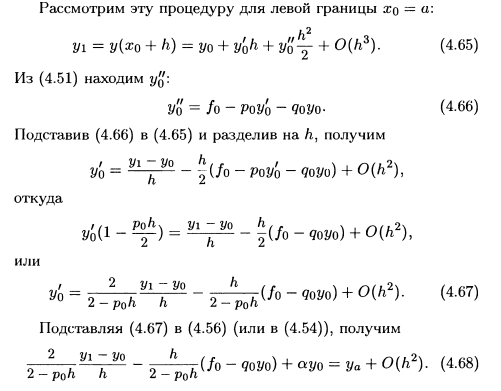
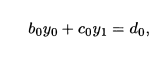
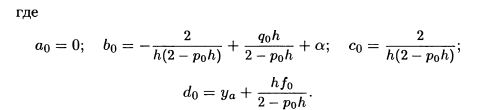
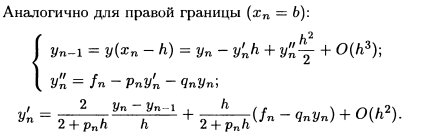

В таких условиях можно самостоятельно составить матрицу, а затем воспользоваться модифицированными функциями для поиска погоночных коэффициентов и корней.

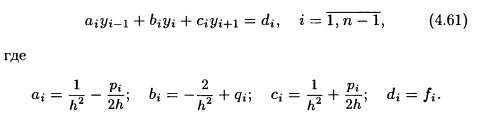

In [79]:
def p_mnoz(x):
    return 2/x
def q_mnoz(x):
    return -1
def f_mnoz(x):
    return 0

In [46]:
# составляет матрицу множителей а, б, ц
def mnoz_of_slau(h, p, q, f):
    vect_a, vect_b, vect_c, vect_d  = [[] for i in range(4)]
    def ai(pi):
        return (1/(h**2)) - (pi/2*h)
        
    def bi(qi):
        return -2/(h**2) + qi
            
    def ci(pi):
        return (1/(h**2)) + (pi/2*h)
    
    for i in p:
        vect_a.append(ai(i)) 
        vect_c.append(ci(i))

    for i in q:
        vect_b.append(bi(i))

    for i in f:
        vect_d.append(i)
    
    return (vect_a, vect_b, vect_c, vect_d)
# работает нормально

In [80]:
def pogonya_a_b(matrix, d):
    A = [0]
    B = [0]
    for i in range(5):
        A.append(-matrix[2][i] / (matrix[1][i] + (matrix[0][i] * A[-1])))
        B.append((d[i] - matrix[0][i] * B[-1]) / (matrix[1][i] + (matrix[0][i] * A[-2])))
    A.pop(0)
    B.pop(0)
    return A, B

In [81]:
# составим матрицу значений p, q, f
p, q, f = [[p_mnoz(x) for x in wh], [q_mnoz(x) for x in wh], [f_mnoz(x) for x in wh]]
# работает исправно

In [82]:
matrix, d = mnoz_of_slau(0.25, p, q, f)[0:3], mnoz_of_slau(0.25, p, q, f)[-1]

In [83]:
# d1, d2 задаются в зависимости от конкретных условий задачи
matrix[0][0], matrix[1][0], matrix[2][0] = 0, 1 - 0.25 ** 2, -1   # значения задаются из задачи 
matrix[0][-1], matrix[1][-1], matrix[2][-1] = 1, -1 + 0.5 - 7 * (0.25**2)/4, 0 # значения задаются из задачи
d[0], d[4] = -0.75 * np.exp(1) + 9/2 * np.exp(1) * 0.25 ** 2, 0

In [53]:
matrix, d

(([0, 16.15, 16.166666666666668, 16.178571428571427, 1],
  [0.9375, -30.2, -30.333333333333332, -30.428571428571427, -0.609375],
  [-1, 15.85, 15.833333333333334, 15.821428571428571, 0]),
 [-1.2741946070901775, 0, 0, 0, 0])

In [54]:
a, b = pogonya_a_b(matrix, d)

In [55]:
a,b

([1.0666666666666667,
  1.2217368961973278,
  1.4962627828205373,
  2.5431567473847188,
  0.0],
 [-1.3591409142295228,
  -1.6919418626521165,
  -2.5848862637778387,
  -6.722163063557009,
  3.4761746368990103])

In [65]:
b = np.array(b) * -1
b[-1] = 29.55

In [66]:
def find_y(a, b):
    y = [0, 0, 0, 0, b[-1]]
    for i in range(len(y) - 2, -1 , -1):
        y[i] = a[i] * y[i + 1] + b[i]
    return y

In [67]:
find_y(a, b)

[126.89612072531827,
 120.23930778707606,
 99.8015612274957,
 68.42811882166144,
 29.55]

In [71]:
for i in wh:
    print(f'X = {i},  y = {count_y_x_i(i)}')

X = 1.0,  y = 2.718281828459045
X = 1.25,  y = 5.453660871034128
X = 1.5,  y = 10.083800408260645
X = 1.75,  y = 17.62347069526755
X = 2.0,  y = 29.5562243957226


# Метод пристрелки

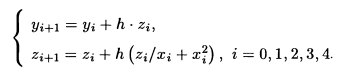

In [44]:
start_dot = 1 # начальная точка 
print(f'Стартовая точка(а) - {start_dot}')
print()
wh = [start_dot + 0.25 * i for i in range(5)]
for i in wh:
    print(f'значение x{wh.index(i)} = {i}')

Стартовая точка(а) - 1

значение x0 = 1.0
значение x1 = 1.25
значение x2 = 1.5
значение x3 = 1.75
значение x4 = 2.0


In [45]:
print(f'Подбираемое (пристреливаемое) значение производной {np.exp(-2)/2 - 0.7}')

Подбираемое (пристреливаемое) значение производной -0.6323323583816935


In [46]:
print(f'Значение угла в радианах в зависимости от подобранного значения производной \
{np.arctan(np.exp(-2)/2 - 0.7)}')

Значение угла в радианах в зависимости от подобранного значения производной -0.5638546552849552


In [47]:
# start_z - начальный z
# start_y - первое граничное условие (в точке а)
import numpy as np
start_z, start_y = np.exp(-2)/2 - 0.7, np.exp(-1)

In [48]:
def z_y_find(start_z, start_y, h, X):
    ans_z = [start_z]
    ans_y = [start_y]
    for i in range(len(X) - 1):
        zi = ans_z[-1] + (h * (ans_z[-1] / (X[i]) + (X[i] ** 2)))
        ans_z.append(zi)
    for i in range(len(X) - 1):
        yi = ans_y[-1] + h * ans_z[i]
        ans_y.append(yi)
    
    return ans_z, ans_y

In [49]:
# вектора значений z и y
z_y_find(start_z, start_y, 0.25, wh)

([-0.6323323583816935,
  -0.5404154479771169,
  -0.25787353757254033,
  0.26164753949870295,
  1.064650759427089],
 [0.36787944117144233,
  0.20979635157601895,
  0.07469248958173971,
  0.01022410518860463,
  0.07563599006328037])

In [50]:
# значения точного решения
for i in wh:
    print(f'X = {i},  y = {count_y_x_i(i)}')

ans = []
for i in wh:
    ans.append(count_y_x_i(i))

y = np.array(z_y_find(start_z, start_y, 0.25, wh)[-1])
ans = np.array(ans)
print(f'Погрешность равна {(sum((y - ans) ** 2))**0.5}')

X = 1.0,  y = 0.36787944117144233
X = 1.25,  y = 0.22920383748815207
X = 1.5,  y = 0.14875344009895322
X = 1.75,  y = 0.09929939625739723
X = 2.0,  y = 0.06766764161830635
Погрешность равна 0.11772670451887048


# Задача 3.2